In [ ]:
# Working with data 2017. Class 5
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
## 1 Assumptions of t-test and regression
- Normality 
- Independent and identically distributed (i.i.d.)
- Equal variance
- (for linear regression) Uncorrelated residuals


## 2.  groups
- Compare one group vs one value
- Compare two groups 
- Compare two paired groups
    
## 3. Multiple groups
- ANOVA
- Multiple comparison (Tukey correction)
    
## 4.  Regressions
- Linear regression
- Logistic regression
- Machine learning

In [1]:
#Install something we'll need
!pip install --user scikits.bootstrap

#Requires restarting the kernel

In [91]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikits.bootstrap as bootstrap

# 1. Assumptions of most tests


## 1.1 Normality


In [4]:
Image(url="https://kanbanize.com/blog/wp-content/uploads/2014/07/Standard_deviation_diagram.png", width=500)

**How to test it**
- QQ plot. Measure our quantiles vs hypothetical quantiles.
- Most tests are resistant to small deviations.

In [14]:
def qq_plot(x):
    import scipy.stats
    (osm, osr),(slope, intercept, r)  = scipy.stats.probplot(x, dist='norm', plot=None)
    plt.plot(osm, osr, '.', osm, slope*osm + intercept)
    plt.xlabel('Quantiles',fontsize=14)
    plt.ylabel('Quantiles Obs',fontsize=14)  

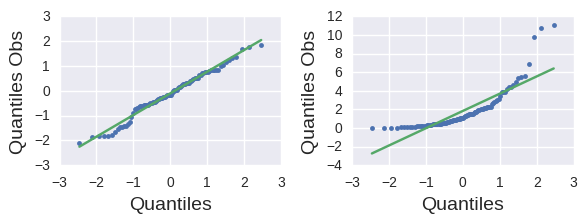

In [55]:
x = np.random.randn(100)
plt.subplot(2,2,1)
qq_plot(x)

x = np.random.exponential(2,100)
plt.subplot(2,2,2)
qq_plot(x)


plt.tight_layout()
plt.show()

## 1.2 Equal variance (if two or more groups)


In [33]:
Image(url="http://goodsciencebadscience.nl/wp-content/uploads/2012/09/variances1.gif",width=500)

**How to test it**
- Levene test (it doesn't assume normality)


In [12]:
#random normal data (mean 0 std 1)
x = np.random.randn(100)
#random normal data (mean 0 std 2)
y = np.random.randn(100)*2

#Test
print(scipy.stats.levene(x,y))


LeveneResult(statistic=40.098137331112042, pvalue=1.5876312204292832e-09)


## 1.3 i.i.d. (independent and identically distributed)
This comes from the data collection.
- Each observation is independent
- There are no subpopulations in the population

## 1.4 Uncorrelated residuals (for linear regression)



In [34]:
print("These are the residuals")
Image(url="https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png",width=500)

These are the residuals


In [8]:
Image(url="https://i.stack.imgur.com/RU17l.png")

## 1.4 No or little multicolinearity (for linear regression)
- Your dependent variables are not measuring the same thing


# 2. t-test

## 2.1 Sample against value
- Imagine you measure increase in productivity, and you want to see if the increase is significant

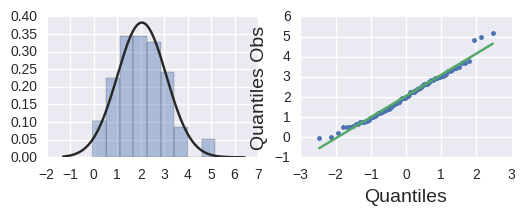

--------------------
Test for mean of group different than zero


Ttest_1sampResult(statistic=19.561758393832346, pvalue=8.7108452542495534e-36)

In [15]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+2

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=False,fit=norm)


plt.subplot(2,2,2)
qq_plot(x)
plt.show()


print("-"*20)
print("Test for mean of group different than zero")
scipy.stats.ttest_1samp(x,popmean=0)

## 2.2 Two independent samples
- Imagine you measure productivity for a control group and a experimental group
- Imagine it's normally distributed 
- You want to see if the productivity of the groups is different

In [16]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.5 and std 1
y = np.random.randn(100)+0.5


#Equal variance?
#We are testing if we can do the test
#If significant it means that the variances are different
print("Test for equal variance")
print(scipy.stats.levene(x,y))


Test for equal variance
LeveneResult(statistic=0.18372231239245079, pvalue=0.66865960819279313)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


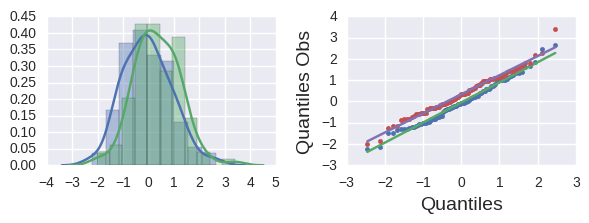

--------------------
Test for different means


Ttest_indResult(statistic=-2.9602185045213134, pvalue=0.0034495814845479505)

In [17]:
#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()

print("-"*20)
print("Test for different means")
scipy.stats.ttest_ind(x,y)


## 2.3 Two paired samples
- Imagine you measure productivity for a group before starting a new program and after the program (each individual has two observations)
- Imagine it's normally distributed
- You can test if the productivity has increased

In [18]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, similar to x but adding 0.05 and some random noise
y = x+np.random.randn(100)/10 + 0.05


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))


Test for equal variance
LeveneResult(statistic=1.2464290960049443e-07, pvalue=0.9997186638758232)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


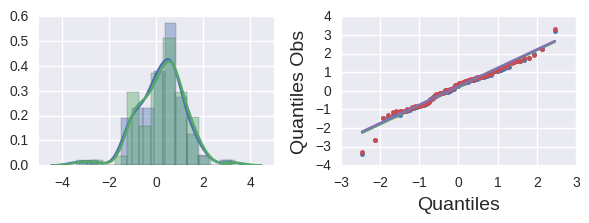

In [19]:
#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()


In [20]:
print("WRONG: What would happen if we don't use paired t-test")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means")
scipy.stats.ttest_rel(x,y)


WRONG: What would happen if we don't use paired t-test
Ttest_indResult(statistic=-0.36128847200154984, pvalue=0.71826902336070653)
--------------------
Test for different means


Ttest_relResult(statistic=-5.1739506148333767, pvalue=1.2001340429502704e-06)

## 2.4 What happens if they don't have equal variance? (But normality)

In [94]:
scipy.stats.ttest_rel?

In [23]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 2
y = np.random.randn(50)*2+0.2


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))


Test for equal variance
LeveneResult(statistic=33.947129051276335, pvalue=3.405985034562977e-08)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


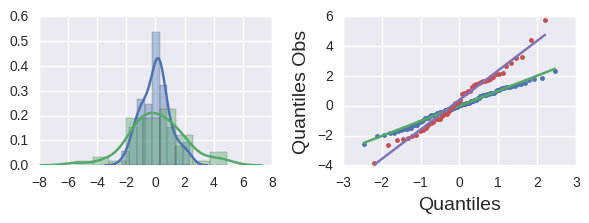

WRONG: What happens if we try the test assumming equal variance
Ttest_indResult(statistic=-1.6473476178397546, pvalue=0.10160817641110562)
--------------------
Test for different means with different variance


Ttest_indResult(statistic=-1.3503948008453872, pvalue=0.18178335336590215)

In [31]:
#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()

print("WRONG: What happens if we try the test assumming equal variance")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means with different variance")
scipy.stats.ttest_ind(x,y,equal_var=False)


## 2.5 What happens if they are not normally distributed (but equal variance)
- Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
- Mann-Whitney-U 

In [39]:
#Our sample, uniformly distributed 
x = np.random.exponential(2,100)
#Our other sample, niformly distributed  + 0.1
y = np.random.exponential(2,100)+0.1


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))



Test for equal variance
LeveneResult(statistic=0.31029262175336686, pvalue=0.5781297914261414)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


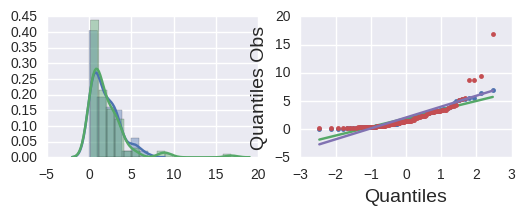

In [40]:

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.show()


In [42]:

print("WRONG: What happens if we try t-test")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means with no normal distributions, equal variance")
scipy.stats.mannwhitneyu(x,y)


WRONG: What happens if we try t-test
Ttest_indResult(statistic=-0.47338561343706537, pvalue=0.63645958719886819)
--------------------
Test for different means with no normal distributions, equal variance and paired samples


MannwhitneyuResult(statistic=4916.0, pvalue=0.41916777366941338)

## 2.6 What happens if they are not normally distributed (but equal variance) and paired samples?
- Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
- Wilcoxon signed ranksum 

In [43]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.random(100)
#Our other sample, normally distributed with mean 0.05 and std 1 and some random noise
y = x+np.random.randn(100)/10 + 0.05

#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))



Test for equal variance
LeveneResult(statistic=0.23002853591535549, pvalue=0.63203201208956483)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


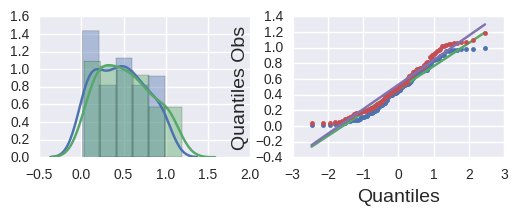

In [44]:

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.show()




In [45]:

print("WRONG: What happens if we try t-test")
print(scipy.stats.ttest_rel(x,y))

print("-"*20)
print("Test for different means with no normal distributions and equal variance")
print(scipy.stats.wilcoxon(x,y))


WRONG: What happens if we try t-test
Ttest_relResult(statistic=-7.0915815375897777, pvalue=1.9977883955834856e-10)
--------------------
Test for different means with no normal distributions and equal variance
WilcoxonResult(statistic=824.0, pvalue=4.9575571539880461e-09)


## 2.6 What happens if they are not normally distributed and not equal variance?
- You can only test if the distributions are different (booo)
- scipy.stats.mannwhitneyu(x,y)

---

# 3. More than two samples

### ANOVA (Parametric) or Kruskal-Wallis (Non parametric)

Analysis of variance (ANOVA) is a collection of statistical models used to analyze the differences between group means and their associated procedures (such as "variation" among and between groups). 
- ~ t-test
- If normality


The Kruskal–Wallis one-way analysis of variance by ranks (named after William Kruskal and W. Allen Wallis) is a non-parametric method for testing whether samples originate from the same distribution. 
- ~ Mann-Whitney-U 
- If no-normality but equal variance

## 3.1 Compare if the groups are different

In [46]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 1
y = np.random.randn(100)+0.2
#Our other sample, normally distributed with mean 0.3 and std 1
z = np.random.randn(100)+0.3


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y,z))



Test for equal variance
LeveneResult(statistic=2.0480092714597573, pvalue=0.13080921080653679)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


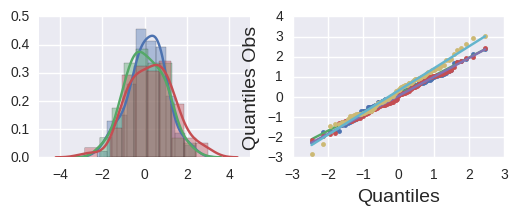

--------------------
ONE-WAY ANOVA
F_onewayResult(statistic=1.9446821552695626, pvalue=0.1448496537094488)
--------------------
ONE-WAY KRUSKAL WALLIS
KruskalResult(statistic=3.3152000000000044, pvalue=0.19059586169236964)


In [47]:

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)
sns.distplot(z,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)
qq_plot(z)

plt.show()

print("-"*20)
print("ONE-WAY ANOVA")
print(scipy.stats.f_oneway(x, y, z)    )
print("-"*20)
print("ONE-WAY KRUSKAL WALLIS") #use if not-normal and equal variance
print(scipy.stats.mstats.kruskalwallis(x,y,z))




## 3.2 Problem with many groups (look-elsewhere bias)

In [64]:
#Let's compare two identical samples, see how often we get false results
for i in range(100):
    x = np.random.randn(100)
    y = np.random.randn(100)
    stat, pvalue = scipy.stats.ttest_ind(x,y)
    if pvalue < 0.05: 
        print(i,pvalue)
    


## 3.3 Compare which groups are different

### 3.3.1 Bonferroni correction
 - Corrects for the number of comparisons that you WILL make (Set p-value before the experiment. Don't cheat please)
 - New threhold to consider something significant is $\frac{0.05}{\#\ of\ comparisons}$

In [65]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 1
y = np.random.randn(100)+0.2
#Our other sample, normally distributed with mean 0.3 and std 1
z = np.random.randn(100)+0.3
#Our other sample, normally distributed with mean 0.3 and std 1
w = np.random.randn(100)+0.5

print("New threshold (instead of 0.05) = ",0.05/6)

#Compare x and y
print("x and y: ", scipy.stats.ttest_ind(x,y))
#Compare x and z
print("x and z: ", scipy.stats.ttest_ind(x,z))
#Compare x and w
print("x and w: ", scipy.stats.ttest_ind(x,w))
#Compare y and z
print("y and z: ", scipy.stats.ttest_ind(y,z))
#Compare y and w
print("y and w: ", scipy.stats.ttest_ind(y,w))
#Compare z and w
print("z and w: ", scipy.stats.ttest_ind(z,w))

New threshold (instead of 0.05) =  0.008333333333333333
x and y:  Ttest_indResult(statistic=-1.5176204931996204, pvalue=0.13070511158476028)
x and z:  Ttest_indResult(statistic=-1.2996294462939917, pvalue=0.19523907106939523)
x and w:  Ttest_indResult(statistic=-1.8995627011104539, pvalue=0.058944076616144633)
y and z:  Ttest_indResult(statistic=0.1720575490687388, pvalue=0.86356801701764385)
y and w:  Ttest_indResult(statistic=-0.43104499058947698, pvalue=0.66690455874746379)
z and w:  Ttest_indResult(statistic=-0.58344029803134156, pvalue=0.56026092381780823)


### 3.3.2 Tukey's HSD (honest significant difference) test. Best
- Assumes normality
- Much more power (less false negatives) than Bonferroni (bonferroni with many samples is hard)

In [144]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [68]:
df = pd.read_csv("data/tukey_example.csv")
df.sample(10)

,productivity,group
178,-0.913089,b
64,-0.014540,a
395,2.065359,d
53,1.224755,a
31,0.239282,a
122,0.982057,b
60,0.081560,a
174,0.972888,b
308,1.297314,d
132,0.643592,b


In [69]:
res2 = pairwise_tukeyhsd(df["productivity"],df["group"])
print(res2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  a      b     0.0542  -0.2883 0.3967 False 
  a      c     0.1966  -0.1459 0.5392 False 
  a      d     0.5083   0.1658 0.8509  True 
  b      c     0.1424  -0.2001 0.485  False 
  b      d     0.4541   0.1116 0.7967  True 
  c      d     0.3117  -0.0308 0.6542 False 
--------------------------------------------


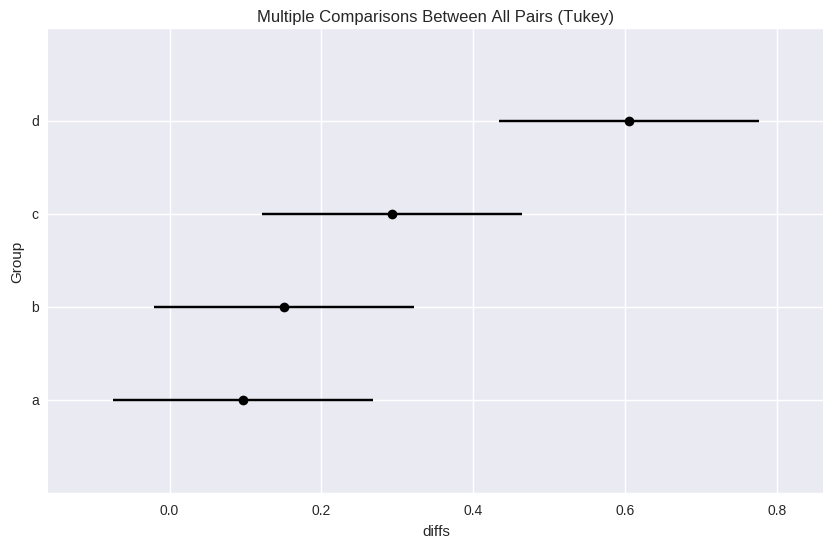

In [70]:
res2.plot_simultaneous(comparison_name=None,xlabel='diffs',ylabel='Group')
plt.show()

# 4. Fitting distributions
## Why do we care about distributions?
- They tell us a lot about the mechanism generating our values

- Normal distribution: 
    - Nothing weird going on (just normal)
- Lognormal distribution: 
    - Multiplicative process: 
        - The value depends on the multiplication of many normal variables.
        - For example, each unit of time you can grow depending on some random factors.
    - Many financial indicators are lognormally distributed
    - Looks like a normal distribution if you take the logarithm of your values (np.log(x))
- Exponential distribution: 
    - Time between events (generated by poisson events)
    - If the time between events follows an exponential distribution the events are independent
    - It's a straight line if the y axis is in log scale
- Power-law distribution: 
    - Rich-get-richer mechanism: Your growth depends on your value -> Inequality is unavoidable
    - The **tails** of some human and financial phenomena follow power-laws.
    - The tail is a straight line in log-log scale (both y and x axis)
    
- Binomial distribution: Number of successes out of a number of trials. Each event independent
- Poisson distribution: Number of successes in some time. Each event independent




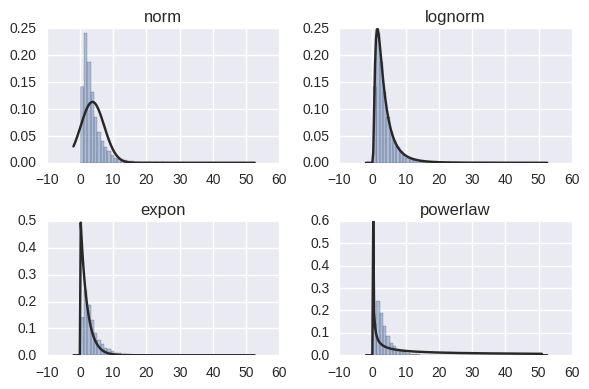

In [73]:
from scipy.stats import lognorm,norm,expon,powerlaw
x = np.random.lognormal(1,0.8,3000) 
plt.subplot(2,2,1)
sns.distplot(x,fit=norm,kde=False)
plt.title("norm")

plt.subplot(2,2,2)
sns.distplot(x,fit=lognorm,kde=False)
plt.title("lognorm")

plt.subplot(2,2,3)
sns.distplot(x,fit=expon,kde=False)
plt.title("expon")

plt.subplot(2,2,4)
sns.distplot(x,fit=powerlaw,kde=False)
plt.title("powerlaw")

plt.tight_layout()
plt.show()

# 5. Calculate Confidence Intervals with bootstrap methods
- How does it work?
- You have a sample (imagine 100 values)
- Do 10000 times: 
    - Take 100 values from the sample (with replacement)
    - Calculate the mean (or std)
- Take the percentiles 2.5 and 97.5 of those 10000 values -> Those are your confidence intervals (kind-of)


In [71]:
import scikits.bootstrap as bootstrap

In [73]:
#Bootstrap of mean and std
x = np.random.randn(100)*3 #this could be one of our columns

CIs = bootstrap.ci(x, statfunction=np.mean,n_samples=100000)  
print('CI for mean with bootstrapping = ', CIs)

CIs = bootstrap.ci(x, statfunction=np.std,n_samples=100000)  
print('CI for std with bootstrapping = ', CIs)

CI for mean with bootstrapping =  [-1.13814925  0.09261081]
CI for std with bootstrapping =  [ 2.77119667  3.62362368]


In [75]:
x = np.random.randn(100)*3
np.mean(x),np.std(x)

(0.33822769269829528, 3.1644168130907633)

In [76]:
CIs = bootstrap.ci(x, statfunction=np.mean,n_samples=100000)  
print('CI for mean with bootstrapping = ', CIs)

CI for mean with bootstrapping =  [-0.26813271  0.9691153 ]


In [78]:
scipy.stats.ttest_1samp(x,popmean=0)

Ttest_1sampResult(statistic=1.0634891829804902, pvalue=0.29014734833454026)

In [79]:
#Bootsrap of p-value
def return_pvalue(x):
    stat,pvalue = scipy.stats.ttest_1samp(x,0)
    return pvalue

CIs = bootstrap.ci(x, statfunction=return_pvalue, n_samples=10000)  
print('CI for p-value with bootstrapping = ', CIs)

CI for p-value with bootstrapping =  [ 0.00407042  0.96082875]


# In class exercise 


In [109]:
df = pd.read_csv("data/big3_position.csv",sep="\t")
df.head()

,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
0,INVESCO LTD,BM40671R,17.85,1,7500000.0,NaN,7500.0,13123024.0,New York Stock Exchange (NYSE),Bank
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,7500000.0,NaN,7500.0,16739323.0,New York Stock Exchange (NYSE),Industrial company
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,350000.0,NaN,1500.0,43392.0,New York Stock Exchange (NYSE),Industrial company
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,350000.0,NaN,750.0,26674.0,NASDAQ National Market,Industrial company
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NaN,NaN,NaN,44120.0,NYSE ARCA,Industrial company


## PartA. Compare the number of employees of industrial vs financial companies

In [81]:
industrial = df.loc[df["TypeEnt"]=="Industrial company"]
financial = df.loc[df["TypeEnt"]=="Financial company"]

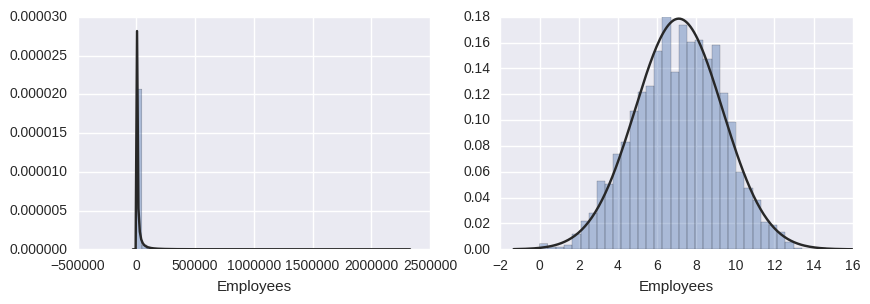

In [84]:
#Employees (like most is lognormally distributed -> we can convert it to a normal distribution and run our tests happily)
i = np.log(industrial["Employees"].dropna())
f = np.log(financial["Employees"].dropna())

from scipy.stats import lognorm,norm
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df["Employees"].dropna(),fit=lognorm,kde=False)

plt.subplot(1,2,2)
sns.distplot(np.log(df["Employees"].dropna()),fit=norm,kde=False)

In [89]:
i.head()

1     8.922658
2     7.313220
3     6.620073
23    3.761200
24    4.672829
Name: Employees, dtype: float64

In [90]:
f.head()

31    7.725330
54    4.189655
56    3.218876
87    6.236370
91    3.891820
Name: Employees, dtype: float64

In [92]:
#Check if our distributions have the same variance
scipy.stats.levene(i,f)

LeveneResult(statistic=3.3037088094994504, pvalue=0.069226865802670651)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


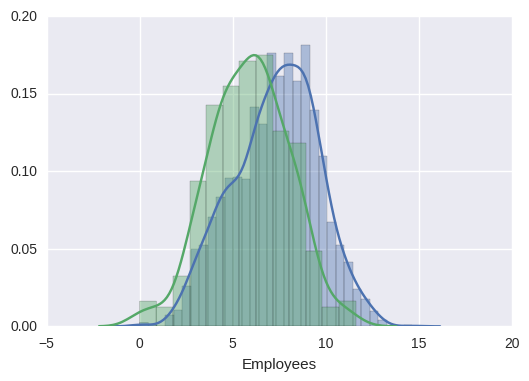

In [97]:
sns.distplot(i)
sns.distplot(f)

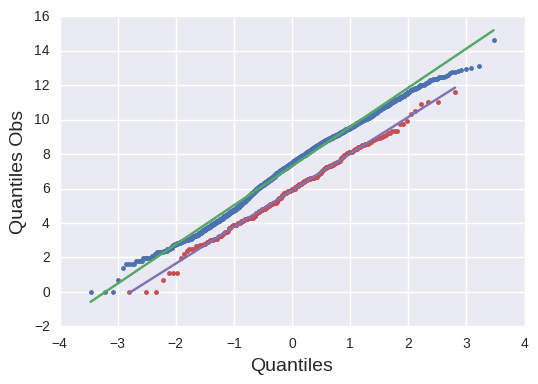

In [95]:
#Plot histograms and qq_plots for i and f
qq_plot(i)
qq_plot(f)

In [98]:
#Run the correct statistical test to know if the 
#number of employees of financial and industrial companies is different
scipy.stats.man(i,f)

MannwhitneyuResult(statistic=233817.5, pvalue=3.205266258082931e-22)

## PartB. Compare the market capitalization for different types of companies

In [123]:
df = pd.read_csv("data/big3_position.csv",sep="\t")
df.head()

,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
0,INVESCO LTD,BM40671R,17.85,1,7500000.0,NaN,7500.0,13123024.0,New York Stock Exchange (NYSE),Bank
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,7500000.0,NaN,7500.0,16739323.0,New York Stock Exchange (NYSE),Industrial company
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,350000.0,NaN,1500.0,43392.0,New York Stock Exchange (NYSE),Industrial company
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,350000.0,NaN,750.0,26674.0,NASDAQ National Market,Industrial company
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NaN,NaN,NaN,44120.0,NYSE ARCA,Industrial company


In [124]:
#Create a new column that is the logarithm of "MarketCap", call it "logMarketCap"
df["logMarketCap"] = np.log(df["MarketCap"])
df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt,logMarketCap
0,INVESCO LTD,BM40671R,17.85,1,7500000.0,NaN,7500.0,13123024.0,New York Stock Exchange (NYSE),Bank,16.389879
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,7500000.0,NaN,7500.0,16739323.0,New York Stock Exchange (NYSE),Industrial company,16.633271
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,350000.0,NaN,1500.0,43392.0,New York Stock Exchange (NYSE),Industrial company,10.678030
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,350000.0,NaN,750.0,26674.0,NASDAQ National Market,Industrial company,10.191445
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NaN,NaN,NaN,44120.0,NYSE ARCA,Industrial company,10.694668


In [112]:
df.describe()

,Big3Share,Position,Revenue,Assets,Employees,MarketCap,logMarketCap
count,3882.000000,3882.000000,3.837000e+03,3.695000e+03,3.300000e+03,3.882000e+03,3882.000000
mean,10.323029,16.122875,3.467816e+06,9.155279e+06,1.066365e+04,5.706551e+06,-inf
std,7.951140,34.876491,1.490323e+07,6.451795e+07,5.129945e+04,2.346929e+07,NaN
min,0.000000,1.000000,-3.757200e+04,2.190000e+02,1.000000e+00,0.000000e+00,-inf
25%,2.420000,1.000000,6.544700e+04,1.588285e+05,2.640000e+02,1.372448e+05,11.829521
50%,10.365000,2.000000,3.867370e+05,8.707830e+05,1.327500e+03,6.494275e+05,13.383845
75%,17.197500,8.000000,1.830800e+06,3.674560e+06,6.243750e+03,2.733080e+06,14.820940
max,48.190000,165.000000,4.821300e+08,2.144316e+09,2.300000e+06,5.496596e+08,20.124810


In [125]:
#Replace infinite values (log(0) = infinite) with nan
df = df.replace([np.inf, -np.inf], np.nan)

#Drop na values if "logMarketCap" is na 
df = df.dropna(subset=["logMarketCap"])


In [114]:
df.describe()

,Big3Share,Position,Revenue,Assets,Employees,MarketCap,logMarketCap
count,3878.000000,3878.000000,3.833000e+03,3.692000e+03,3.296000e+03,3.878000e+03,3878.000000
mean,10.333677,16.036101,3.471048e+06,9.162528e+06,1.067561e+04,5.712437e+06,13.347133
std,7.948320,34.789581,1.491066e+07,6.454366e+07,5.132941e+04,2.348068e+07,2.181133
min,0.000000,1.000000,-3.757200e+04,2.190000e+02,1.000000e+00,1.000000e+00,0.000000
25%,2.420000,1.000000,6.612000e+04,1.590505e+05,2.647500e+02,1.376925e+05,11.832778
50%,10.375000,2.000000,3.867670e+05,8.743075e+05,1.329500e+03,6.529460e+05,13.389249
75%,17.200000,8.000000,1.837287e+06,3.679478e+06,6.279750e+03,2.737552e+06,14.822574
max,48.190000,165.000000,4.821300e+08,2.144316e+09,2.300000e+06,5.496596e+08,20.124810


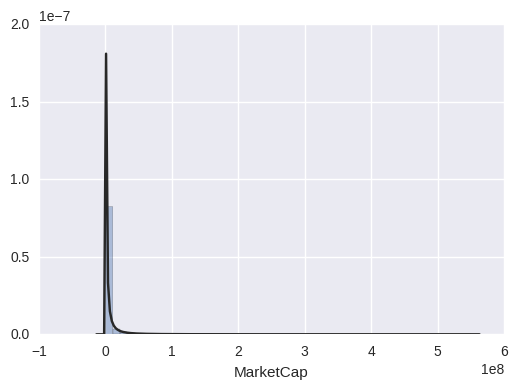

In [115]:
#Find the distribution of "MarketCap" and "logMarketCap", fitting the rigth distribution
from scipy.stats import norm,lognorm,expon
sns.distplot(df["MarketCap"],fit=lognorm,kde=False)

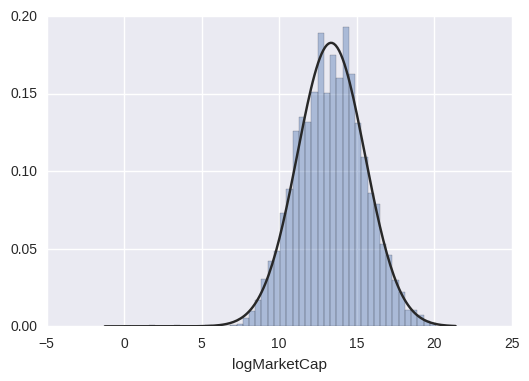

In [116]:
#Find the distribution of "MarketCap" and "logMarketCap", fitting the rigth distribution
from scipy.stats import norm,lognorm,expon
sns.distplot(df["logMarketCap"],fit=norm,kde=False)

In [126]:
#Kepe only three types of entities
df = df.loc[df["TypeEnt"].isin(["Financial company","Industrial company","Bank"])]

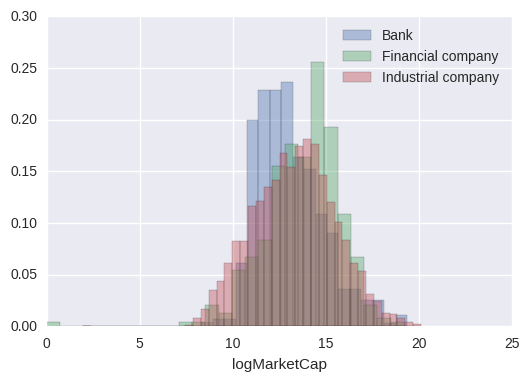

In [118]:
#Plot distributions for each type
plt.figure(figsize=(6,4))
for typeent,group in df.groupby("TypeEnt"):
    sns.distplot(group["logMarketCap"],kde=False,norm_hist=True,label=typeent)

    plt.legend()

In [127]:
#Run ANOVA
bank = df.loc[df["TypeEnt"] == "Bank"]
bank_values = bank["logMarketCap"]

ind = df.loc[df["TypeEnt"] == "Industrial company"]
ind_values = ind["logMarketCap"]

fin = df.loc[df["TypeEnt"] == "Financial company"]
fin_values = fin["logMarketCap"]

scipy.stats.f_oneway(bank_values,ind_values,fin_values)

F_onewayResult(statistic=9.6548583490128426, pvalue=6.5712383714430791e-05)

In [128]:
#Run Tukey test
res2 = pairwise_tukeyhsd(df["logMarketCap"],df["TypeEnt"])
print(res2)

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1            group2       meandiff  lower   upper  reject
--------------------------------------------------------------------
       Bank       Financial company   0.6829   0.3149  1.051   True 
       Bank       Industrial company  0.238   -0.0201  0.4962 False 
Financial company Industrial company -0.4449  -0.7385 -0.1513  True 
--------------------------------------------------------------------


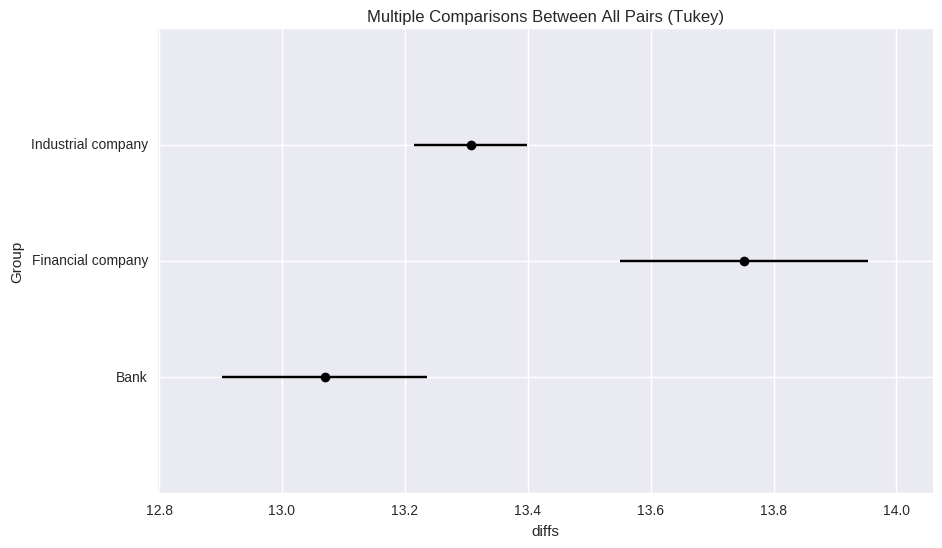

In [129]:
#Plot tukey test
res2.plot_simultaneous(comparison_name=None,xlabel='diffs',ylabel='Group')
plt.show()
